In [1]:
import pandas as pd
url = "https://rate.bot.com.tw/gold/chart/year/TWD"
df = pd.read_html(url)
df #詢問什麼是df

[             日期       牌價幣別 商品重量  本行買入價格  本行賣出價格
 0    2023/08/31  新台幣 (TWD)  1公克    1975    2001
 1    2023/08/30  新台幣 (TWD)  1公克    1967    1993
 2    2023/08/29  新台幣 (TWD)  1公克    1956    1982
 3    2023/08/28  新台幣 (TWD)  1公克    1947    1973
 4    2023/08/25  新台幣 (TWD)  1公克    1947    1973
 ..          ...        ...  ...     ...     ...
 243  2022/09/07  新台幣 (TWD)  1公克    1677    1699
 244  2022/09/06  新台幣 (TWD)  1公克    1687    1709
 245  2022/09/05  新台幣 (TWD)  1公克    1676    1698
 246  2022/09/02  新台幣 (TWD)  1公克    1662    1684
 247  2022/09/01  新台幣 (TWD)  1公克    1662    1684
 
 [248 rows x 5 columns]]

In [2]:
len(df)

1

In [3]:
df = df[0]
df

,日期,牌價幣別,商品重量,本行買入價格,本行賣出價格
0,2023/08/31,新台幣 (TWD),1公克,1975,2001
1,2023/08/30,新台幣 (TWD),1公克,1967,1993
2,2023/08/29,新台幣 (TWD),1公克,1956,1982
3,2023/08/28,新台幣 (TWD),1公克,1947,1973
4,2023/08/25,新台幣 (TWD),1公克,1947,1973
...,...,...,...,...,...
243,2022/09/07,新台幣 (TWD),1公克,1677,1699
244,2022/09/06,新台幣 (TWD),1公克,1687,1709
245,2022/09/05,新台幣 (TWD),1公克,1676,1698
246,2022/09/02,新台幣 (TWD),1公克,1662,1684


In [4]:
gold = df[['日期','本行賣出價格']]
gold

,日期,本行賣出價格
0,2023/08/31,2001
1,2023/08/30,1993
2,2023/08/29,1982
3,2023/08/28,1973
4,2023/08/25,1973
...,...,...
243,2022/09/07,1699
244,2022/09/06,1709
245,2022/09/05,1698
246,2022/09/02,1684


In [5]:
gold.index = pd.to_datetime(gold['日期'], format="%Y/%m/%d")
gold

,日期,本行賣出價格
日期,,
2023-08-31,2023/08/31,2001
2023-08-30,2023/08/30,1993
2023-08-29,2023/08/29,1982
2023-08-28,2023/08/28,1973
2023-08-25,2023/08/25,1973
...,...,...
2022-09-07,2022/09/07,1699
2022-09-06,2022/09/06,1709
2022-09-05,2022/09/05,1698


In [6]:
#畫曲線圖應由小到大
gold.sort_index(inplace=True)
gold

<ipython-input-6-d5fe0e57193f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold.sort_index(inplace=True)


,日期,本行賣出價格
日期,,
2022-09-01,2022/09/01,1684
2022-09-02,2022/09/02,1684
2022-09-05,2022/09/05,1698
2022-09-06,2022/09/06,1709
2022-09-07,2022/09/07,1699
...,...,...
2023-08-25,2023/08/25,1973
2023-08-28,2023/08/28,1973
2023-08-29,2023/08/29,1982


<Axes: xlabel='日期'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


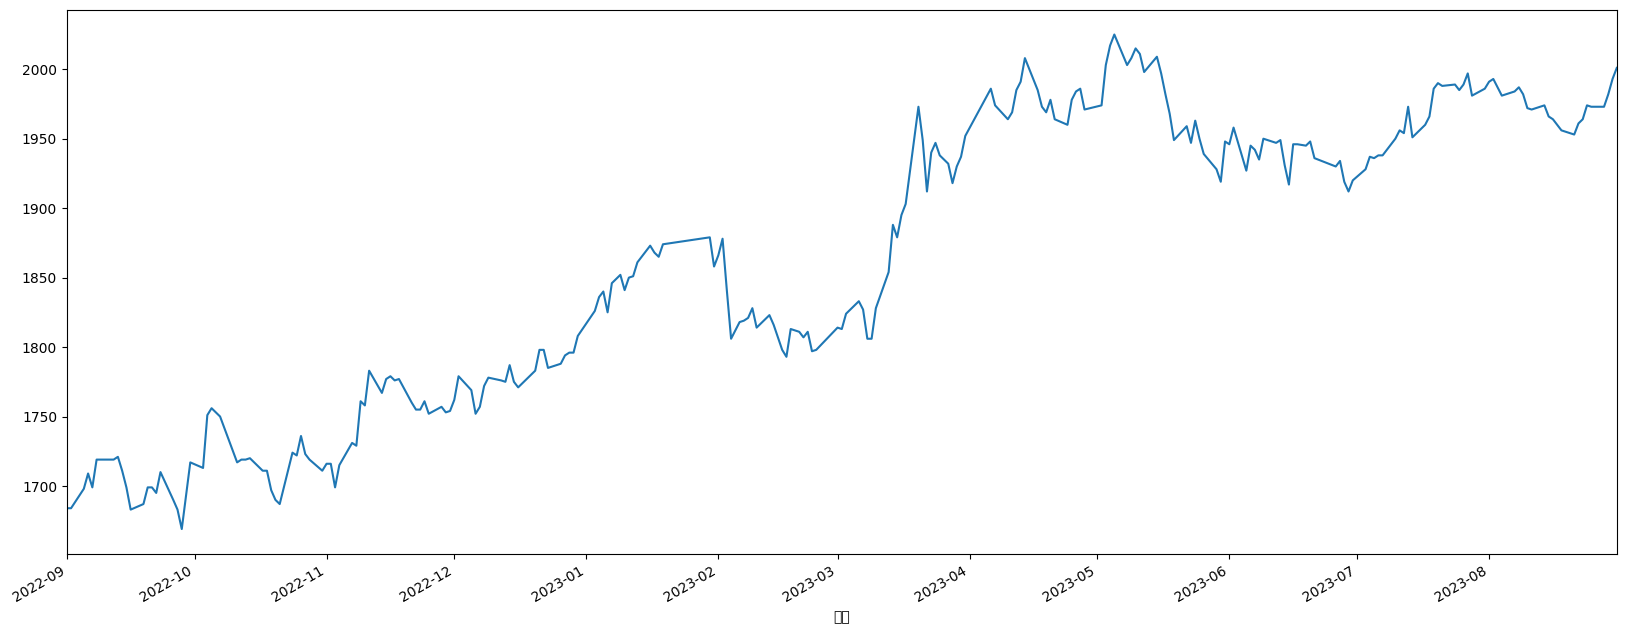

In [8]:
import matplotlib.pyplot as plt #繪圖函式庫
plt.rcParams['font.family'] = ['Microsoft YaHei'] #讓其看得懂中文 微軟版本
gold['本行賣出價格'].plot(kind='line', figsize=[20,8], xlim=('2022-09-01','2023-08-31')) #折線圖,圖表大小,ｘ軸隔線



In [10]:
# 五日線
gold['ma5']=gold['本行賣出價格'].rolling(window=5).mean()
gold

<ipython-input-10-ca0633c97b88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold['ma5']=gold['本行賣出價格'].rolling(window=5).mean()


,日期,本行賣出價格,ma5
日期,,,
2022-09-01,2022/09/01,1684,NaN
2022-09-02,2022/09/02,1684,NaN
2022-09-05,2022/09/05,1698,NaN
2022-09-06,2022/09/06,1709,NaN
2022-09-07,2022/09/07,1699,1694.8
...,...,...,...
2023-08-25,2023/08/25,1973,1965.0
2023-08-28,2023/08/28,1973,1969.0
2023-08-29,2023/08/29,1982,1973.2


In [11]:
# 三十日線
gold['ma30']=gold['本行賣出價格'].rolling(window=30).mean()
gold

<ipython-input-11-87d2a3a06b7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold['ma30']=gold['本行賣出價格'].rolling(window=30).mean()


,日期,本行賣出價格,ma5,ma30
日期,,,,
2022-09-01,2022/09/01,1684,NaN,NaN
2022-09-02,2022/09/02,1684,NaN,NaN
2022-09-05,2022/09/05,1698,NaN,NaN
2022-09-06,2022/09/06,1709,NaN,NaN
2022-09-07,2022/09/07,1699,1694.8,NaN
...,...,...,...,...
2023-08-25,2023/08/25,1973,1965.0,1975.800000
2023-08-28,2023/08/28,1973,1969.0,1976.533333
2023-08-29,2023/08/29,1982,1973.2,1977.266667


<Axes: xlabel='日期'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 36067 (\N{CJK UNIFIED IDEOGRAPH-8CE3}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51

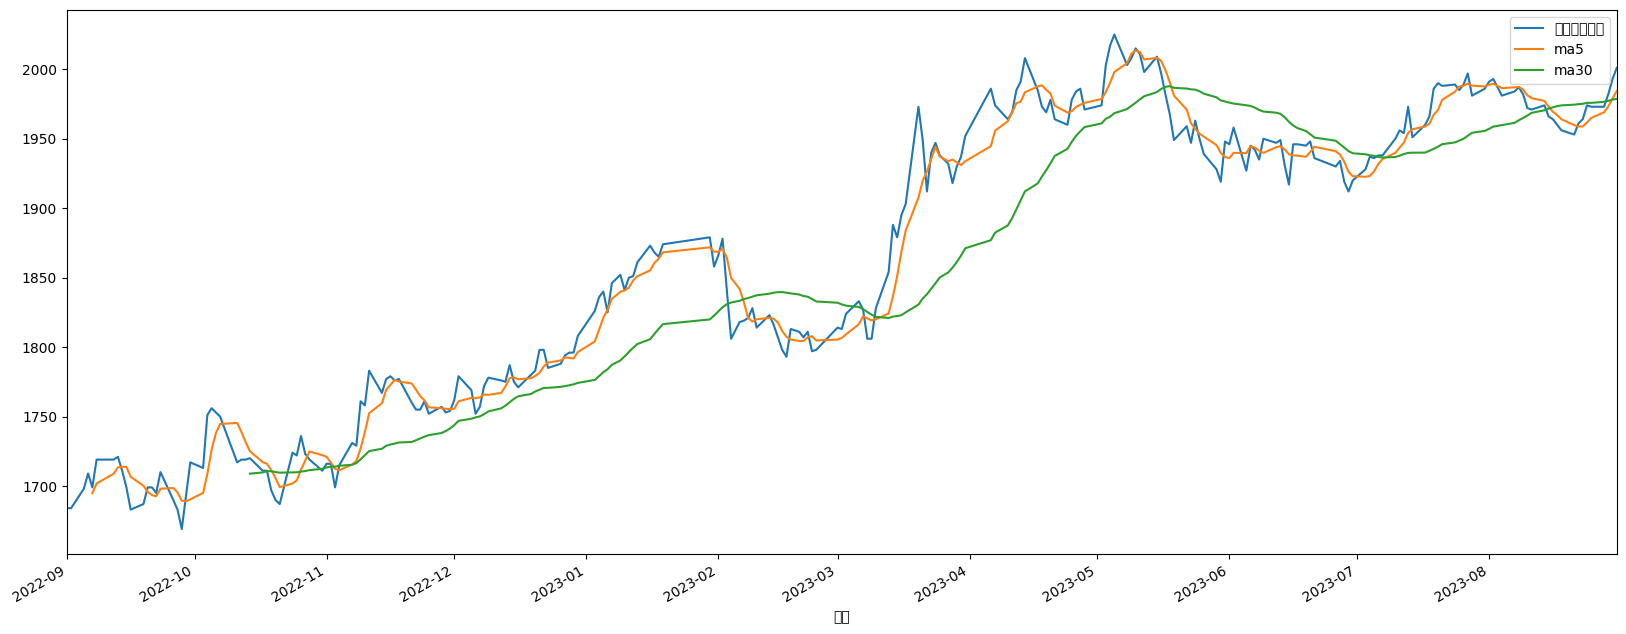

In [12]:
gold[['本行賣出價格','ma5','ma30']].plot(kind='line', figsize=[20,8], xlim=('2022-09-01','2023-08-31')) #折線圖,圖表大小,ｘ軸隔線



# Pandas和Numpy

Pandas常用的資料類型有

1.Series: 一維陣列, 列(index)為資料儲存順序

2.DataFrame: 二維陣列, 由列(index)和欄(column)組合